# Import the required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Reading our Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Shant\OneDrive\Documents\Dataset\Real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.shape

(414, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Visualise the heatmap

<Axes: >

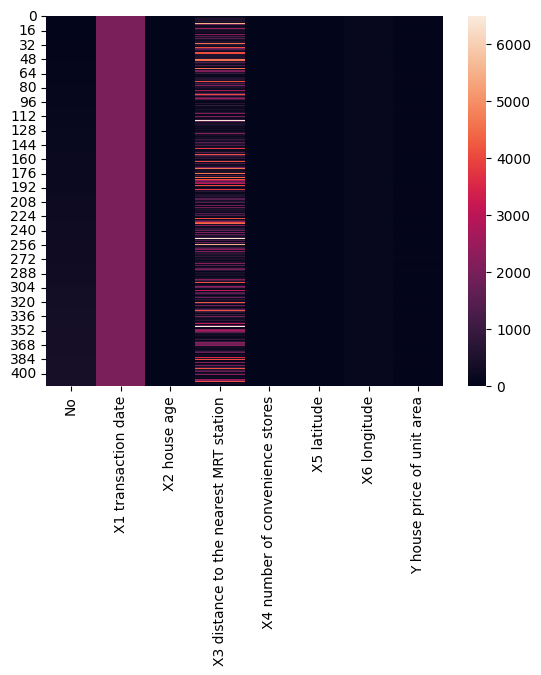

In [7]:
sns.heatmap(df)

# Checking correlation in the dataset

In [8]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

# Using pandas

In [9]:
corr_matrix = df[['Y house price of unit area',
                  'X5 latitude', 
                  'X2 house age', 
                  'X3 distance to the nearest MRT station', 
                  'X6 longitude']].corr()

print(corr_matrix['Y house price of unit area'])

Y house price of unit area                1.000000
X5 latitude                               0.546307
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X6 longitude                              0.523287
Name: Y house price of unit area, dtype: float64


# Using scipy

In [10]:
corr_lat, p_lat = stats.pearsonr(df['Y house price of unit area'], df['X5 latitude'])
corr_age, p_age = stats.pearsonr(df['Y house price of unit area'], df['X2 house age'])
corr_dist, p_dist = stats.pearsonr(df['Y house price of unit area'], df['X3 distance to the nearest MRT station'])
corr_long, p_long = stats.pearsonr(df['Y house price of unit area'], df['X6 longitude'])

print("Latitude:", corr_lat, "p:", p_lat)
print("House Age:", corr_age, "p:", p_age)
print("MRT Distance:", corr_dist, "p:", p_dist)
print("Longitude:", corr_long, "p:", p_long)

Latitude: 0.5463066525036047 p: 1.3877612957722838e-33
House Age: -0.21056704627721684 p: 1.5604255047970785e-05
MRT Distance: -0.6736128553689181 p: 4.639825030361809e-56
Longitude: 0.5232865070287559 p: 1.765190604057497e-30


# Make features

In [11]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# Spliting data

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [15]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [17]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.5532450005316664


In [18]:
lr.intercept_

np.float64(38.44186851211001)

In [19]:
lr.coef_

array([-0.72123507,  1.65460419, -2.72645031, -6.51757473,  3.17693966,
        2.95217602, -0.821401  ])

In [21]:

mae  = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("\nTest MAE :", round(mae, 4))
print("Test MSE:", round(mse, 4))

# Quick 5-fold CV on the whole dataset (r²)
cv_scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
print("\n5-fold CV R²: mean =", round(cv_scores.mean(), 4),
      " | std =", round(cv_scores.std(), 4))



Test MAE : 6.2664
Test MSE: 74.7087

5-fold CV R²: mean = 0.5845  | std = 0.0965
